# Lasy losowe

In [1]:
import arff

# Wczytaj plik ARFF
with open('adult.arff', 'r') as f:
    data = arff.load(f)

# Pobierz nagłówki atrybutów
attributes = data['attributes']

# Pobierz dane
data_rows = data['data']

# Wyświetl przykładowe dane
print("Nagłówki atrybutów:")
print(attributes)

Nagłówki atrybutów:
[('age', ['0', '1', '2', '3', '4']), ('workclass', ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']), ('fnlwgt', 'REAL'), ('education', ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool']), ('education-num', 'REAL'), ('marital-status', ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']), ('occupation', ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']), ('relationship', ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']), ('race', ['White', 'Asian-Pac-Islander', 'Amer-Indian

In [2]:
import pandas as pd

df = pd.DataFrame(data_rows, columns=[attr[0] for attr in attributes])

df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

In [ ]:
y = df.pop("class")
y = y.map({'>50K': 1, '<=50K': 0})

# Zamiana wartości kategorycznych ma liczbowe 

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns

one_hot_encoder = OneHotEncoder(
    drop="first", sparse=False, handle_unknown="ignore"
)

categorical_pipeline = Pipeline([ ("one_hot_encoder", one_hot_encoder) ])

column_transformer = ColumnTransformer([
    ("categorical_transformer", categorical_pipeline, categorical_features),
    ("numerical_transformer", SimpleImputer(strategy='mean'), numerical_features)
], verbose_feature_names_out=False)

X = column_transformer.fit_transform(df)

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Trenowanie drzew z różnymi parametrami

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import numpy as np

# Definicja klasyfikatorów
rf_classifier = RandomForestClassifier(random_state=42)
et_classifier = ExtraTreesClassifier(random_state=42)

# Przygotowanie siatki parametrów do przeszukania
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_features': ['log2', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_et = {
    'n_estimators': [50, 100],
    'max_features': ['log2', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Wykorzystanie zagnieżdżonej kroswalidacji do przeszukania parametrów i oceny wydajności modeli
rf_grid_search = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
et_grid_search = GridSearchCV(et_classifier, param_grid_et, cv=5, scoring='accuracy')

# Wyniki zagnieżdżonej kroswalidacji
rf_nested_scores = cross_val_score(rf_grid_search, X, y, cv=5)
et_nested_scores = cross_val_score(et_grid_search, X, y, cv=5)

# Wybór najlepszych hiperparametrów

In [23]:
rf_grid_search.fit(X, y)
et_grid_search.fit(X, y)

# Wyniki dla najlepszych modeli
best_rf_model = rf_grid_search.best_estimator_
best_et_model = et_grid_search.best_estimator_

# Ocena najlepszych modeli na zbiorze testowym
rf_test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
et_test_accuracy = accuracy_score(y_test, best_et_model.predict(X_test))

rf_test_precision = precision_score(y_test, best_rf_model.predict(X_test), pos_label= 1)
et_test_precision = precision_score(y_test, best_et_model.predict(X_test), pos_label= 1)

rf_test_recall = recall_score(y_test, best_rf_model.predict(X_test), pos_label= 1)
et_test_recall = recall_score(y_test, best_et_model.predict(X_test), pos_label= 1)

# Wydrukowanie wyników
print("Random Forest:")
print("Najlepsze parametry:", rf_grid_search.best_params_)
print("Średnia dokładność (accuracy) zagnieżdżonej kroswalidacji:", np.mean(rf_nested_scores))
print("Odchylenie standardowe dokładności (accuracy) zagnieżdżonej kroswalidacji:", np.std(rf_nested_scores))
print("Dokładność na zbiorze testowym:", rf_test_accuracy)
print("Precyzja (precision) na zbiorze testowym:", rf_test_precision)
print("Czułość (recall) na zbiorze testowym:", rf_test_recall)

print("\nExtra Trees:")
print("Najlepsze parametry:", et_grid_search.best_params_)
print("Średnia dokładność (accuracy) zagnieżdżonej kroswalidacji:", np.mean(et_nested_scores))
print("Odchylenie standardowe dokładności (accuracy) zagnieżdżonej kroswalidacji:", np.std(et_nested_scores))
print("Dokładność na zbiorze testowym:", et_test_accuracy)
print("Precyzja (precision) na zbiorze testowym:", et_test_precision)
print("Czułość (recall) na zbiorze testowym:", et_test_recall)

Random Forest:
Najlepsze parametry: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Średnia dokładność (accuracy) zagnieżdżonej kroswalidacji: 0.8491885161151831
Odchylenie standardowe dokładności (accuracy) zagnieżdżonej kroswalidacji: 0.002749403804545627
Dokładność na zbiorze testowym: 0.8846876727473743
Precyzja (precision) na zbiorze testowym: 0.83663631494376
Czułość (recall) na zbiorze testowym: 0.6791304347826087

Extra Trees:
Najlepsze parametry: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Średnia dokładność (accuracy) zagnieżdżonej kroswalidacji: 0.8491000499003827
Odchylenie standardowe dokładności (accuracy) zagnieżdżonej kroswalidacji: 0.003897351826728946
Dokładność na zbiorze testowym: 0.8897733554449972
Precyzja (precision) na zbiorze testowym: 0.8416360776088097
Czułość (recall) na zbiorze testowym: 0.6978260869565217


## Wnioski
### Wpływ parametrów na dokładność klasyfikatorów jest niewielki, róznice w klasyfikatorach wynoszą tylko kilka procent. 

# Wypisanie najważniejszcyh cech

In [81]:
# Pobranie wartości feature importances dla modeli RandomForest i ExtraTrees
rf_feature_importances = best_rf_model.feature_importances_
et_feature_importances = best_et_model.feature_importances_

# Powrót z wartości endodowanych
feature_names = column_transformer.get_feature_names_out()
X_b = pd.DataFrame(X, columns=feature_names)

# Utworzenie DataFrame z informacją o ważności cech dla obu modeli
feature_importances_df = pd.DataFrame({
    'Feature': X_b.columns,
    'Random Forest': rf_feature_importances,
    'Extra Trees': et_feature_importances
})

# Sortowanie cech według ważności w modelu RandomForest
sorted_rf_feature_importances = feature_importances_df.sort_values(by='Random Forest', ascending=False)
print("Najważniejsze cechy dla modelu RandomForest:")
print(sorted_rf_feature_importances.head())

# Sortowanie cech według ważności w modelu ExtraTrees
sorted_et_feature_importances = feature_importances_df.sort_values(by='Extra Trees', ascending=False)
print("\nNajważniejsze cechy dla modelu ExtraTrees:")
print(sorted_et_feature_importances.head())

Najważniejsze cechy dla modelu RandomForest:
                               Feature  Random Forest  Extra Trees
26   marital-status_Married-civ-spouse       0.152610     0.164669
107                      education-num       0.111215     0.059112
106                             fnlwgt       0.075023     0.018337
57                       capitalgain_4       0.069792     0.075530
28        marital-status_Never-married       0.058848     0.081239

Najważniejsze cechy dla modelu ExtraTrees:
                               Feature  Random Forest  Extra Trees
26   marital-status_Married-civ-spouse       0.152610     0.164669
28        marital-status_Never-married       0.058848     0.081239
57                       capitalgain_4       0.069792     0.075530
107                      education-num       0.111215     0.059112
44          relationship_Not-in-family       0.040587     0.041508


## Najważniejsz cechy dla modelu RandomForest
### - Married-civilian-spouse tj. osoba jest w związku małżeńskim z cywilnym małżonkiem
### - education-num oznaczające ilość lat spędzonym na formalnej edukacji
### - fnlwgt oznacza "final weight", czyli wagę końcową, która reprezentuje, jak dobrze próbka reprezentuje populację ogólną
### - capitalgain_4 czyli największy pułap zysków kapitałowych 
### - marital-status informująca nas czy dana osoba kiedykolwiek wzięła ślub

## Najważniejsz cechy dla modelu ExtraTrees
### - Married-civilian-spouse tj. osoba jest w związku małżeńskim z cywilnym małżonkiem
### - education-num oznaczające ilość lat spędzonym na formalnej edukajci
### - relationship Not-in-family oznacza osobe mieszkająca samodzielnie lub nie z rodziną, lub mającą inne relacje społeczne
### - capitalgain_4 czyli największy pułap zysków kapitałowych 
### - marital-status informująca nas czy dana osoba kiedykolwiek wzięła ślub

## Wnioski
### Korelacja mięszy ilością lat spędzonych na kształceniu się a zarobkami jest spodziewana.
### Również ma sens, że osoby w związaku mają większe zarobki ponieważ mogą podzielić koszty życia takie jak czynsz czy samochód na dwie osoby

In [82]:
# Sortowanie cech według ważności w modelu RandomForest (malejąco)
sorted_rf_feature_importances_least = feature_importances_df.sort_values(by='Random Forest', ascending=True)
print("Najmniej ważne cechy dla modelu RandomForest:")
print(sorted_rf_feature_importances_least.head())

# Sortowanie cech według ważności w modelu ExtraTrees (malejąco)
sorted_et_feature_importances_least = feature_importances_df.sort_values(by='Extra Trees', ascending=True)
print("\nNajmniej ważne cechy dla modelu ExtraTrees:")
print(sorted_et_feature_importances_least.head())

Najmniej ważne cechy dla modelu RandomForest:
                                      Feature  Random Forest  Extra Trees
79          native-country_Holand-Netherlands   0.000000e+00     0.000000
80                    native-country_Honduras   2.920466e-07     0.000000
31                    occupation_Armed-Forces   2.988309e-06     0.000010
92  native-country_Outlying-US(Guam-USVI-etc)   6.050552e-06     0.000001
82                     native-country_Hungary   1.013777e-05     0.000014

Najmniej ważne cechy dla modelu ExtraTrees:
                                       Feature  Random Forest  Extra Trees
80                     native-country_Honduras   2.920466e-07     0.000000
79           native-country_Holand-Netherlands   0.000000e+00     0.000000
92   native-country_Outlying-US(Guam-USVI-etc)   6.050552e-06     0.000001
31                     occupation_Armed-Forces   2.988309e-06     0.000010
101                    native-country_Thailand   2.351378e-05     0.000013


## Najmniej ważne cechy dla modelu RandomForest
### - kraj pochodzenia: Holandia
### - kraj pochodzenia: Honduras
### - branża: wojsko
### - kraj pochodzenia: Dalekie Wyspy Mniejsze Stanów Zjednoczonych
### - kraj pochodzenia: Hungary

## Najmniej ważne cechy dla modelu RandomForest
### - kraj pochodzenia: Holandia
### - kraj pochodzenia: Honduras
### - branża: wojsko
### - kraj pochodzenia: Dalekie Wyspy Mniejsze Stanów Zjednoczonych
### - kraj pochodzenia: Tajlandia

## Wnioski
### jest to najprawdopodobniej spowodowane tym, że osoby z tymi cechami występowały bardzo żadko w bazie danych (np. była tylko jedna osoba pochodząca z Holandii)
### lub tym że pochodziły z mniej zamożnych krajów np. z Węgier

# Krzywa ROC

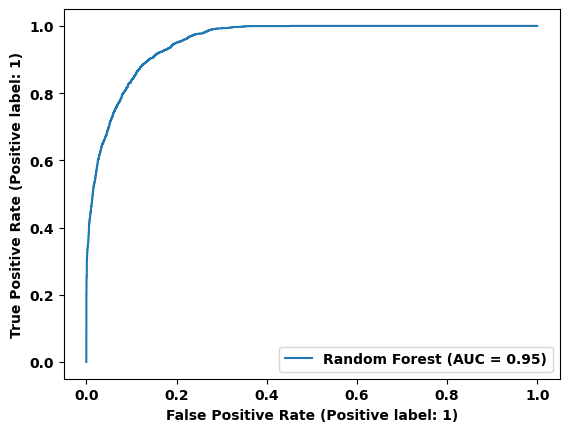

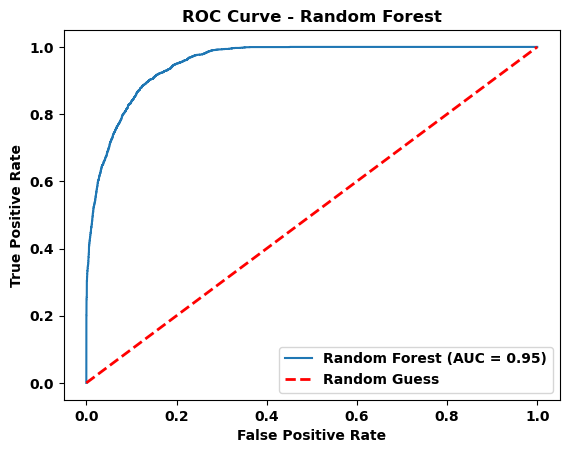

In [72]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Wykres krzywej ROC dla modelu RandomForest
rf_disp = RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test, name='Random Forest')
rf_disp.plot()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

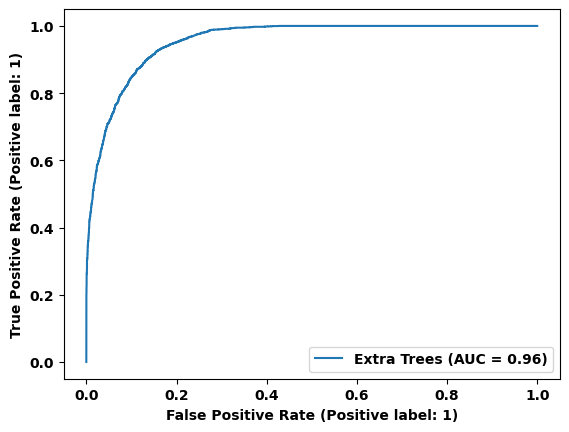

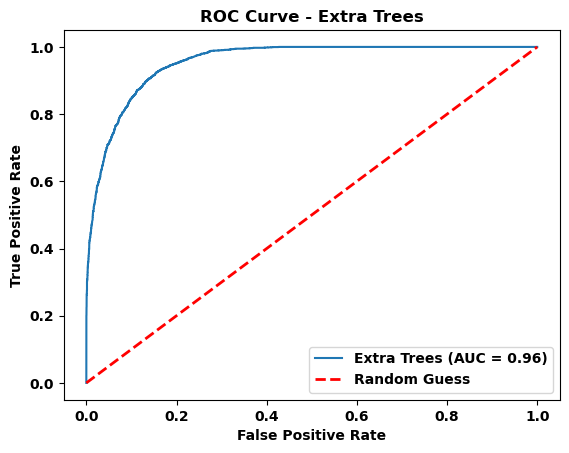

In [73]:

# Wykres krzywej ROC dla modelu ExtraTrees
et_disp = RocCurveDisplay.from_estimator(best_et_model, X_test, y_test, name='Extra Trees')
et_disp.plot()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees')
plt.legend()
plt.show()